<h1 style="background-color:rgba(124, 40, 29, 0.92); font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Netflix dataset</b>
</h1>

**Key Features**  :

- **show_id**: Unique identifier for each show
- **type**: Whether it is a movie or TV show
- **title**: Name of the show
- **director**: Director of the show (if available)
- **cast**: Actors in the show
- **country**: Country of origin
- **date_added**: Date when it was added to Netflix
- **release_year**: Year the show was released
- **rating**: Age rating (e.g., PG, R, TV-MA)
- **duration**: Duration of the movie or number of seasons for - TV shows
- **listed_in**: Genres or categories
- **description**: Brief summary of the show

# `01` Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `02` Load Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/shivamb/netflix-shows)

In [2]:
data=pd.read_csv(r'O:\iti\ZzZ projects\Netflix\netflix_titles.csv')

# `03` Simple Analysis & Exploratory Data Analysis (EDA)

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

### There are nulls in the data

In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### No duplicated data

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.nunique().sort_values()

type               2
rating            17
release_year      74
duration         220
listed_in        514
country          748
date_added      1767
director        4528
cast            7692
description     8775
show_id         8807
title           8807
dtype: int64

### Distribution of data

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\485789175.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="type", palette="coolwarm")


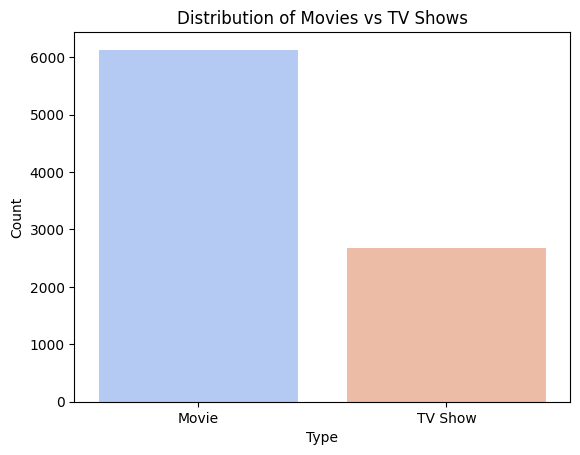

In [28]:
sns.countplot(data=data, x="type", palette="coolwarm")
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\13468921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


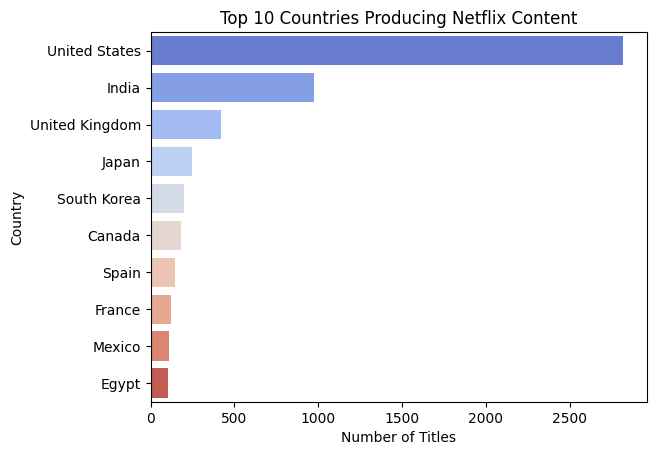

In [9]:
top_countries = data["country"].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

## Display Netflix content over years

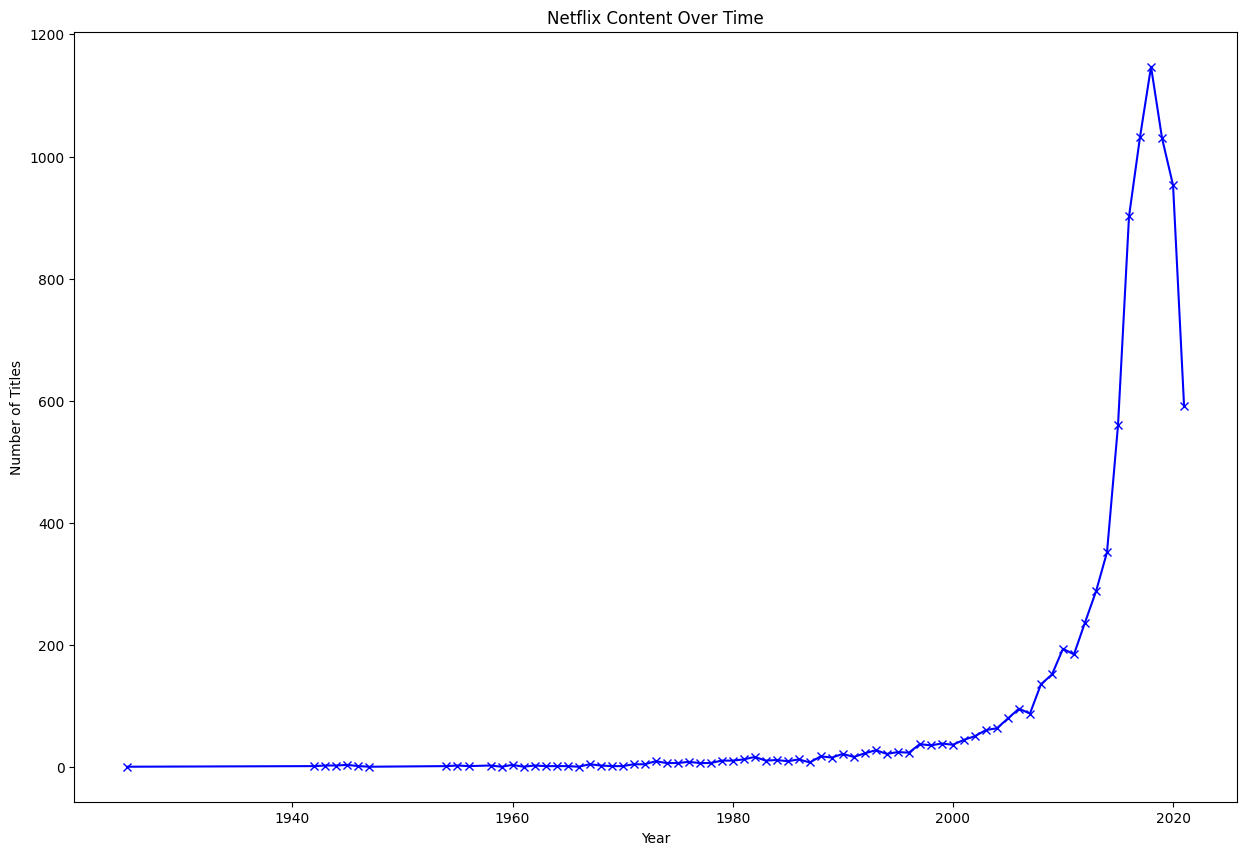

In [34]:
plt.figure(figsize=(15,10))
data["release_year"].value_counts().sort_index().plot(kind="line", marker="x", color="b")
plt.title("Netflix Content Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


## movies released in the 1990s (1990-1999)

In [11]:
data["release_year"] = pd.to_numeric(data["release_year"], errors="coerce")
df_90s = data[(data["release_year"] >= 1990) & (data["release_year"] < 2000) & (data["type"] == "Movie")]
df_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
26,s27,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",NaN,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",A tangled love triangle ensues when a man fall...
114,s115,Movie,Anjaam,Rahul Rawail,"Madhuri Dixit, Shah Rukh Khan, Tinnu Anand, Jo...",India,"September 2, 2021",1994,TV-14,143 min,"Dramas, International Movies, Thrillers",A wealthy industrialist’s dangerous obsession ...


C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\398895967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_90s, x="release_year", palette="coolwarm")


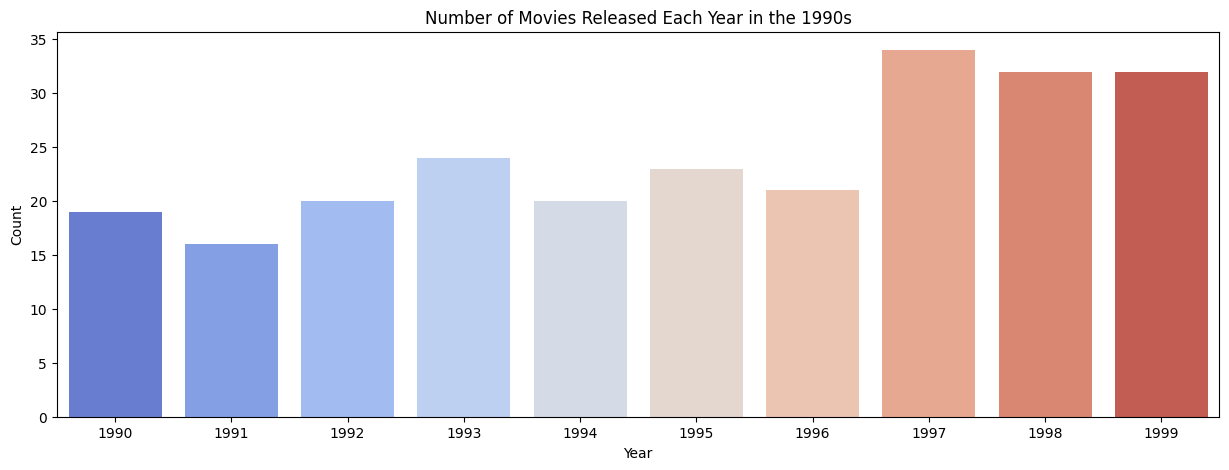

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_90s, x="release_year", palette="coolwarm")
plt.title("Number of Movies Released Each Year in the 1990s")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [13]:
df_20s = data[(data["release_year"] >= 2000) & (data["release_year"] < 2010) & (data["type"] == "Movie")]
df_20s.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
48,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,"September 16, 2021",2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...
51,s52,Movie,InuYasha the Movie 2: The Castle Beyond the Lo...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Mieko Harada...",Japan,"September 15, 2021",2002,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...","With their biggest foe seemingly defeated, Inu..."
52,s53,Movie,InuYasha the Movie 3: Swords of an Honorable R...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2003,TV-14,99 min,"Action & Adventure, Anime Features, Internatio...",The Great Dog Demon beaqueathed one of the Thr...
53,s54,Movie,InuYasha the Movie 4: Fire on the Mystic Island,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2004,TV-PG,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho..."
54,s55,Movie,InuYasha the Movie: Affections Touching Across...,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,"September 15, 2021",2001,TV-PG,100 min,"Action & Adventure, Anime Features, Internatio...",A powerful demon has been sealed away for 200 ...


C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\2517358187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_20s, x="release_year", palette="magma")


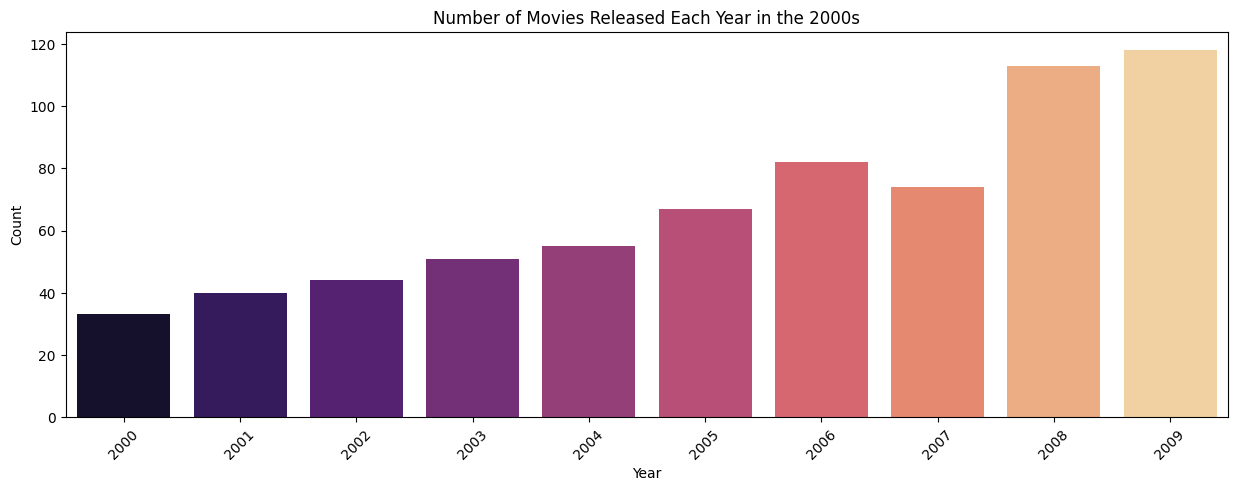

In [36]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_20s, x="release_year", palette="magma")
plt.title("Number of Movies Released Each Year in the 2000s")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


## Top 10 Most Frequent Directors

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\2871715686.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")


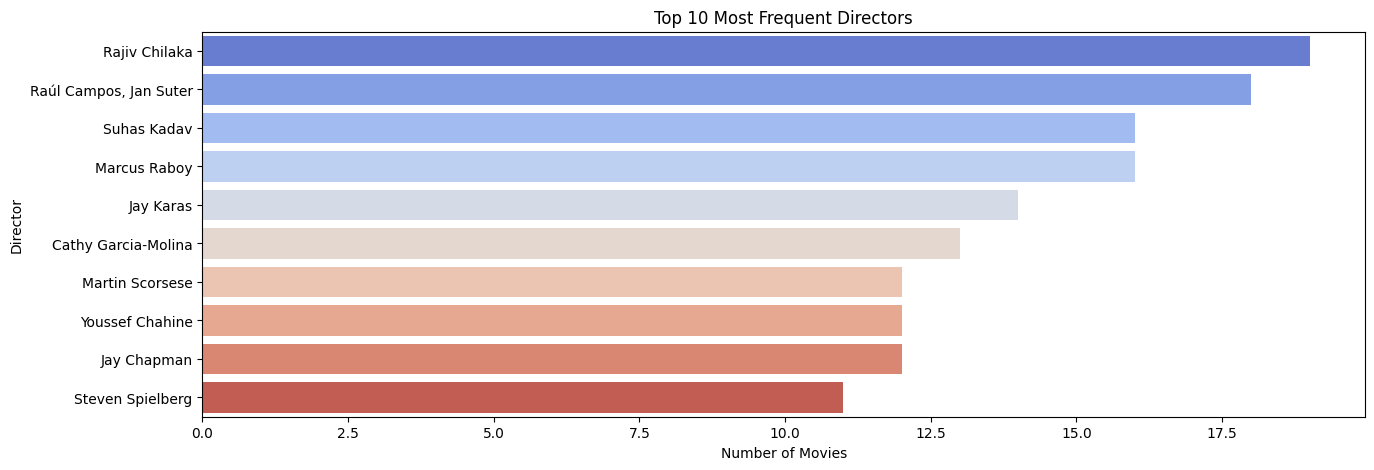

In [15]:
top_directors = data["director"].value_counts().head(10)

plt.figure(figsize=(15,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Directors")
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.show()


## Most Common Movie Ratings

C:\Users\Omar Elgema3y\AppData\Local\Temp\ipykernel_17304\4047976272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")


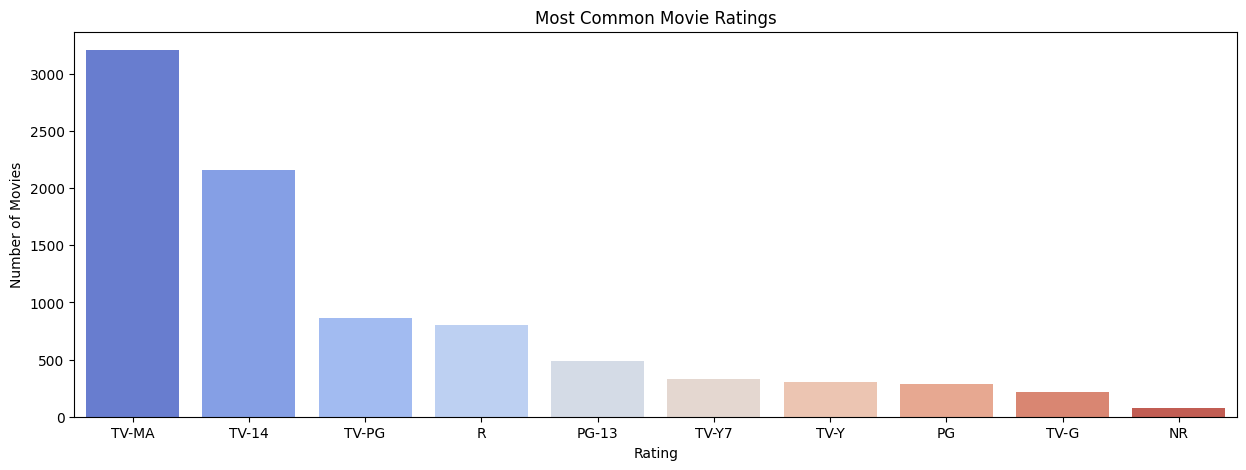

In [16]:
rating_counts = data["rating"].value_counts().head(10)
plt.figure(figsize=(15,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")
plt.title("Most Common Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.show()


In [17]:
family_ratings = ["G", "PG", "TV-G", "TV-Y", "TV-Y7", "TV-Y7-FV"]
r_ratings = ["R", "TV-MA", "NC-17"]
family_movies = data[data["rating"].isin(family_ratings)].shape[0]
r_movies = data[data["rating"].isin(r_ratings)].shape[0]
other_movies = len(data) - (family_movies + r_movies)

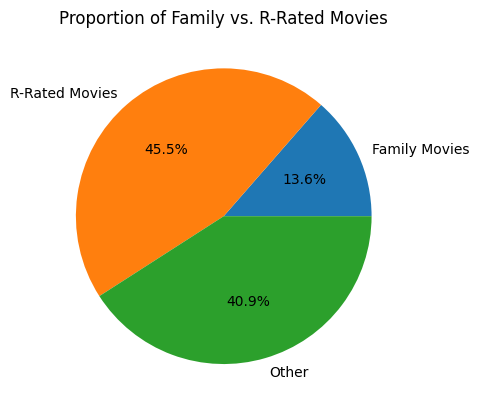

In [18]:
labels = ["Family Movies", "R-Rated Movies", "Other"]
sizes = [family_movies, r_movies, other_movies]
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
plt.title("Proportion of Family vs. R-Rated Movies")
plt.show()
